# CS231a PSET 2

You can use this colab notebook to write your code in, which could save you the trouble of having to set up Python or installing packages.

In [1]:
import os

# Enter the foldername in your local environment where you have saved the unzipped
# files containing the 'data' folder and epipolar_utils.py and sfm_utils.py
# needed for this PSET
# e.g. 'cs231a/ps2_code'
FOLDERNAME = 'E:\course\cs231a\ps2_code (1)'

assert FOLDERNAME is not None, "[!] Enter the foldername."

os.chdir(FOLDERNAME)
print('Files in this folder:')
print(os.listdir('.'))


Files in this folder:
['data', 'epipolar_utils.py', 'p1.py', 'p2.py', 'p3.py', 'p4.py', 'PSET2.ipynb', 'sfm_utils.py', '__pycache__']


# Problem 1: Fundamental Matrix Estimation From Point Correspondences

Make sure you have run the code block above and have access to the data for this problem. Now, you can fill out the logic for this problem. Once done, copy it to p1.py for submission to Gradescope.

--------------------------------------------------------------------------------
Set: data/set1
--------------------------------------------------------------------------------
Fundamental Matrix from LLS  8-point algorithm:
 [[ 1.55218081e-06 -5.86997052e-06 -3.52312036e-03]
 [-8.18161523e-06 -3.02892219e-07  1.41453881e-02]
 [-1.50440111e-03 -1.13607605e-02  9.99828068e-01]]
Distance to lines in image 1 for LLS: 26.398795322787656
Distance to lines in image 2 for LLS: 34.4509503467142
p'^T F p = 0.9365987100381044
Fundamental Matrix from normalized 8-point algorithm:
 [[ 5.87279536e-07 -4.03485994e-06 -8.45100568e-04]
 [-4.74162427e-06 -2.70840075e-07  8.25185957e-03]
 [ 1.00983891e-04 -4.59163404e-03  2.42080292e-02]]
Distance to lines in image 1 for normalized: 26.158518810915133
Distance to lines in image 2 for normalized: 13.978702307445676


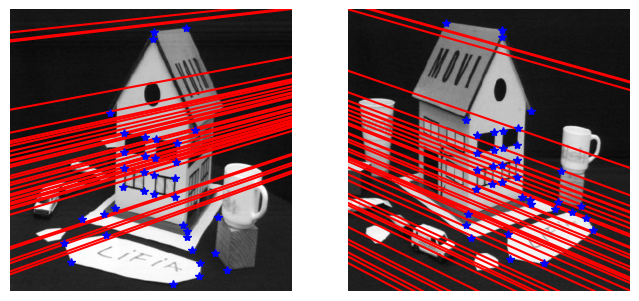

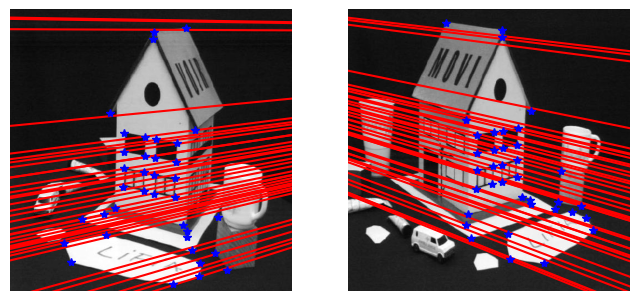

--------------------------------------------------------------------------------
Set: data/set2
--------------------------------------------------------------------------------
Fundamental Matrix from LLS  8-point algorithm:
 [[-5.63087200e-06 -2.77622828e-05  1.07623595e-02]
 [ 2.74976583e-05 -6.74748522e-06 -1.22519240e-02]
 [-6.42650411e-03  1.52182033e-02 -9.99730547e-01]]
Distance to lines in image 1 for LLS: 9.770548001058629
Distance to lines in image 2 for LLS: 7.341659474569871
p'^T F p = 0.8501572745771373
Fundamental Matrix from normalized 8-point algorithm:
 [[-1.56278740e-07  3.80453364e-06  3.55298300e-04]
 [ 2.54113176e-06  3.30505331e-07 -9.48893547e-03]
 [-1.96807924e-04  6.54025151e-03  3.43057336e-01]]
Distance to lines in image 1 for normalized: 10.078345110008746
Distance to lines in image 2 for normalized: 7.449915238479121


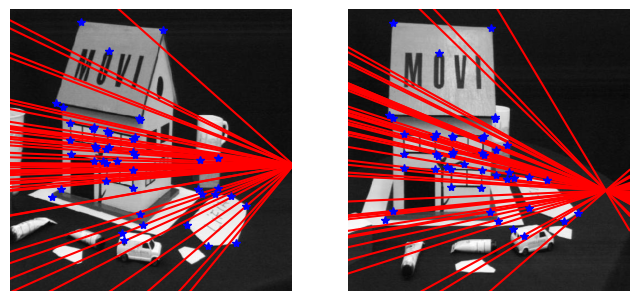

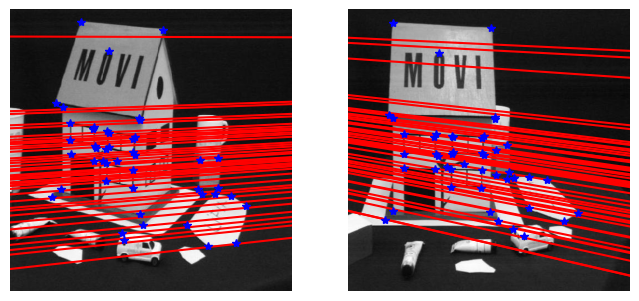

In [2]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from epipolar_utils import *
import numpy as np

'''
LLS_EIGHT_POINT_ALG  computes the fundamental matrix from matching points using 
linear least squares eight point algorithm
Arguments:
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1

    Both points1 and points2 are from the get_data_from_txt_file() method
Returns:
    F - the fundamental matrix such that (points2)^T * F * points1 = 0
Please see lecture notes and slides to see how the linear least squares eight
point algorithm works
'''
def lls_eight_point_alg(points1, points2):
    A = []
    for i in range(points1.shape[0]):
        x1, y1,_ = points1[i]
        x2, y2,_ = points2[i]
        A.append([x1*x2, x1*y2, x1, y1*x2, y1*y2, y1, x2, y2, 1])
    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    f = V[-1]
    F = f.reshape(3, 3)
    
    # Enforce rank-2 constraint on F
    U, S, V = np.linalg.svd(F)
    S[2] = 0
    F = np.dot(U, np.dot(np.diag(S), V))
    
    return F

'''
NORMALIZED_EIGHT_POINT_ALG  computes the fundamental matrix from matching points
using the normalized eight point algorithm
Arguments:
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1

    Both points1 and points2 are from the get_data_from_txt_file() method
Returns:
    F - the fundamental matrix such that (points2)^T * F * points1 = 0
Please see lecture notes and slides to see how the normalized eight
point algorithm works
'''
def normalized_eight_point_alg(points1, points2):
    # TODO: Implement this method!
    x1=points1[:,0]
    y1=points1[:,1]
    x2=points2[:,0]
    y2=points2[:,1]
    x1_mean=np.mean(x1)
    y1_mean=np.mean(y1)
    x2_mean=np.mean(x2)
    y2_mean=np.mean(y2)
    x1_std=np.std(x1)
    y1_std=np.std(y1)
    x2_std=np.std(x2)
    y2_std=np.std(y2)
    T1=np.array([[1/x1_std,0,-x1_mean/x1_std],[0,1/y1_std,-y1_mean/y1_std],[0,0,1]])
    T2=np.array([[1/x2_std,0,-x2_mean/x2_std],[0,1/y2_std,-y2_mean/y2_std],[0,0,1]])
    
    points1=np.dot(T1,points1.T).T
    points2=np.dot(T2,points2.T).T
    A = []
    for i in range(points1.shape[0]):
        x1, y1,_ = points1[i]
        x2, y2,_ = points2[i]
        A.append([x1*x2, x1*y2, x1, y1*x2, y1*y2, y1, x2, y2, 1])
    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    f = V[-1]
    F = f.reshape(3, 3)
    U, S, V=np.linalg.svd(F)
    S[2]=0
    F=np.dot(U,np.dot(np.diag(S),V))
    F=np.dot(T2.T,np.dot(F,T1))
    return F

    raise Exception('Not Implemented Error')

'''
PLOT_EPIPOLAR_LINES_ON_IMAGES given a pair of images and corresponding points,
draws the epipolar lines on the images
Arguments:
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1
    im1 - a HxW(xC) matrix that contains pixel values from the first image 
    im2 - a HxW(xC) matrix that contains pixel values from the second image 
    F - the fundamental matrix such that (points2)^T * F * points1 = 0

    Both points1 and points2 are from the get_data_from_txt_file() method
Returns:
    Nothing; instead, plots the two images with the matching points and
    their corresponding epipolar lines. See Figure 1 within the problem set
    handout for an example
'''
def plot_epipolar_lines_on_images(points1, points2, im1, im2, F):

    def plot_epipolar_lines_on_image(points1, points2, im, F):
        im_height = im.shape[0]
        im_width = im.shape[1]
        lines = F.T.dot(points2.T)
        plt.imshow(im, cmap='gray')
        for line in lines.T:
            a,b,c = line
            xs = [1, im.shape[1]-1]
            ys = [(-c-a*x)/b for x in xs]
            plt.plot(xs, ys, 'r')
        for i in range(points1.shape[0]):
            x,y,_ = points1[i]
            plt.plot(x, y, '*b')
        plt.axis([0, im_width, im_height, 0])

    # We change the figsize because matplotlib has weird behavior when 
    # plotting images of different sizes next to each other. This
    # fix should be changed to something more robust.
    new_figsize = (8 * (float(max(im1.shape[1], im2.shape[1])) / min(im1.shape[1], im2.shape[1]))**2 , 6)
    fig = plt.figure(figsize=new_figsize)
    plt.subplot(121)
    plot_epipolar_lines_on_image(points1, points2, im1, F)
    plt.axis('off')
    plt.subplot(122)
    plot_epipolar_lines_on_image(points2, points1, im2, F.T)
    plt.axis('off')

'''
COMPUTE_DISTANCE_TO_EPIPOLAR_LINES  computes the average distance of a set a 
points to their corresponding epipolar lines. Compute just the average distance
from points1 to their corresponding epipolar lines (which you get from points2).
Arguments:
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1
    F - the fundamental matrix such that (points2)^T * F * points1 = 0

    Both points1 and points2 are from the get_data_from_txt_file() method
Returns:
    average_distance - the average distance of each point to the epipolar line
'''
def compute_distance_to_epipolar_lines(points1, points2, F):
    # TODO: Implement this method!
 
    lines1 = np.dot(F.T, points1.T)
    lines2 = np.dot(F, points2.T)
    lines1 = lines1.T  # Transpose to match the shape of points1
    lines2 = lines2.T  # Transpose to match the shape of points2
    distance1 = np.abs(np.sum(points1 * lines1, axis=1)) / np.sqrt(np.sum(lines1[:, :2]**2, axis=1))
    average_distance = (np.mean(distance1)) / 2
    return average_distance
    raise Exception('Not Implemented Error')

if __name__ == '__main__':
    for im_set in ['data/set1', 'data/set2']:
        print('-'*80)
        print("Set:", im_set)
        print('-'*80)

        # Read in the data
        im1 = imread(im_set+'/image1.jpg')
        im2 = imread(im_set+'/image2.jpg')
        points1 = get_data_from_txt_file(im_set+'/pt_2D_1.txt')
        points2 = get_data_from_txt_file(im_set+'/pt_2D_2.txt')
        assert (points1.shape == points2.shape)

        # Running the linear least squares eight point algorithm
        F_lls = lls_eight_point_alg(points1, points2)
        print("Fundamental Matrix from LLS  8-point algorithm:\n", F_lls)
        print("Distance to lines in image 1 for LLS:", \
            compute_distance_to_epipolar_lines(points1, points2, F_lls))
        print("Distance to lines in image 2 for LLS:", \
            compute_distance_to_epipolar_lines(points2, points1, F_lls.T))

        # Running the normalized eight point algorithm
        F_normalized = normalized_eight_point_alg(points1, points2)

        pFp = [points2[i].dot(F_normalized.dot(points1[i])) 
            for i in range(points1.shape[0])]
        print("p'^T F p =", np.abs(pFp).max())
        print("Fundamental Matrix from normalized 8-point algorithm:\n", \
            F_normalized)
        print("Distance to lines in image 1 for normalized:", \
            compute_distance_to_epipolar_lines(points1, points2, F_normalized))
        print("Distance to lines in image 2 for normalized:", \
            compute_distance_to_epipolar_lines(points2, points1, F_normalized.T))

        # Plotting the epipolar lines
        plot_epipolar_lines_on_images(points1, points2, im1, im2, F_lls)
        plot_epipolar_lines_on_images(points1, points2, im1, im2, F_normalized)

        plt.show()


# Problem 2: Matching Homographies for Image Rectification

First, make sure you have access to the data. Then, complete this code and then copy it to p2.py for submission to Gradescope.

e1 [-1.13002566e+03 -1.18663356e+02  1.00000000e+00]
e2 [1.73781803e+03 4.34920673e+01 1.00000000e+00]



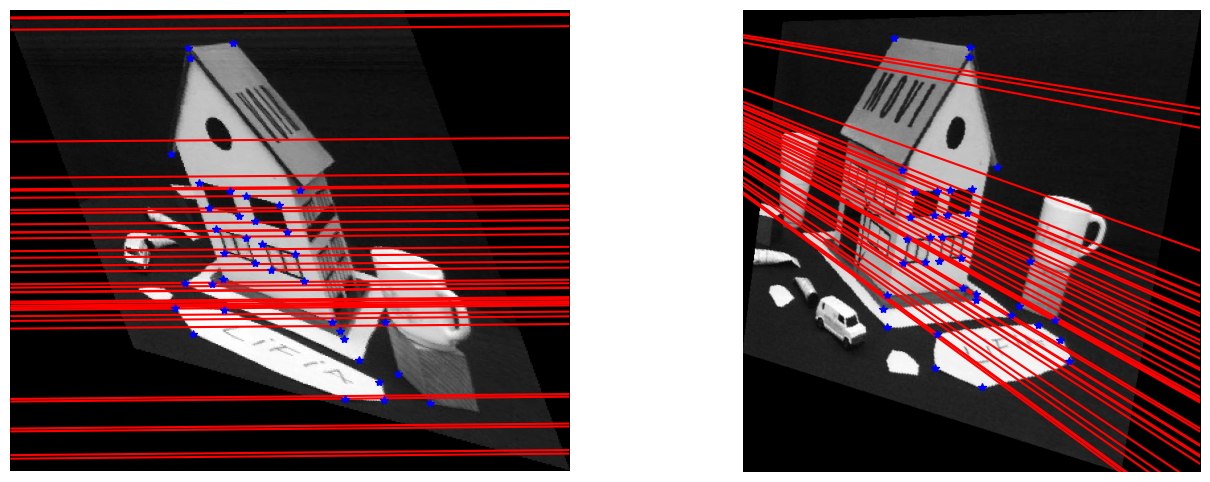

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from epipolar_utils import *

'''
COMPUTE_EPIPOLE computes the epipole e in homogenous coordinates
given the fundamental matrix
Arguments:
    F - the Fundamental matrix solved for with normalized_eight_point_alg(points1, points2)

Returns:
    epipole - the homogenous coordinates [x y 1] of the epipole in the image
'''
def compute_epipole(F):
    # TODO: Implement this method!
    U, S, V = np.linalg.svd(F)
    epipole = V[-1]/V[-1][2]
    return epipole

'''
COMPUTE_H computes a homography to map an epipole to infinity along the horizontal axis 
Arguments:
    e - the epipole
    im2 - the image
Returns:
    H - homography matrix
'''
def compute_H(e, im):
    # TODO: Implement this method!
    
    height = im.shape[0]
    width = im.shape[1]
    T=np.array([[1,0,-width/2],
                [0,1,-height/2],
                [0,0,1]])
    T_inv=np.linalg.inv(T)
    e=np.dot(T,e)
    alpha=np.sign(e[0])
    R = np.array([[alpha * e[0] / np.sqrt(e[0] ** 2 + e[1] ** 2), alpha * e[1] / np.sqrt(e[0] ** 2 + e[1] ** 2), 0],
                  [-alpha * e[1] / np.sqrt(e[0] ** 2 + e[1] ** 2), alpha * e[0] / np.sqrt(e[0] ** 2 + e[1] ** 2), 0],
                  [0, 0, 1]])
    f=np.dot(R,e)[0]
    G=np.array([[1,0,0],[0,1,0],[-1/f,0,1]])
    GRT=np.dot(G,np.dot(R,T))
    H=np.dot(T_inv,GRT)
    return H

'''
COMPUTE_MATCHING_HOMOGRAPHIES determines homographies H1 and H2 such that they
rectify a pair of images
Arguments:
    e2 - the second epipole
    F - the Fundamental matrix
    im2 - the second image
    points1 - N points in the first image that match with points2
    points2 - N points in the second image that match with points1
Returns:
    H1 - the homography associated with the first image
    H2 - the homography associated with the second image
'''
def compute_matching_homographies(e2, F, im2, points1, points2):
    # TODO: Implement this method!
    ''''''
    e2x=np.array([[0,-e2[2],e2[1]],
                  [e2[2],0,-e2[0]],
                  [-e2[1],e2[0],0]])
    v=np.array([1,1,1])
    M_=np.outer(e2,v)
    M=np.dot(e2x,F)+M_
    H2=compute_H(e2,im2)
    P1_hat=np.dot(np.dot(H2,M),points1.T).T
    P1_hat=P1_hat/P1_hat[:,2].reshape(-1, 1)
    P2_hat=np.dot(H2,points2.T).T
    P2_hat=P2_hat/P2_hat[:,2].reshape(-1, 1)
    A, _, _, _ = np.linalg.lstsq(P1_hat, P2_hat[:, 0], rcond=None)
    HA = np.eye(3)
    HA[0]=A.reshape(-1,3)
    H1=np.dot(HA,np.dot(H2,M))
    return H1, H2

    raise Exception('Not Implemented Error')

if __name__ == '__main__':
    # Read in the data
    im_set = 'data/set1'
    im1 = imread(im_set+'/image1.jpg')
    im2 = imread(im_set+'/image2.jpg')
    points1 = get_data_from_txt_file(im_set+'/pt_2D_1.txt')
    points2 = get_data_from_txt_file(im_set+'/pt_2D_2.txt')
    assert (points1.shape == points2.shape)

    F = normalized_eight_point_alg(points1, points2)
    # F is such that such that (points2)^T * F * points1 = 0, so e1 is e' and e2 is e
    e1 = compute_epipole(F.T)
    e2 = compute_epipole(F)
    print("e1", e1)
    print("e2", e2)

    # Find the homographies needed to rectify the pair of images
    H1, H2 = compute_matching_homographies(e2, F, im2, points1, points2)
    print('')

    # Transforming the images by the homographies
    new_points1 = H1.dot(points1.T)
    new_points2 = H2.dot(points2.T)
    new_points1 /= new_points1[2,:]
    new_points2 /= new_points2[2,:]
    new_points1 = new_points1.T
    new_points2 = new_points2.T
    rectified_im1, offset1 = compute_rectified_image(im1, H1)
    rectified_im2, offset2 = compute_rectified_image(im2, H2)
    new_points1 -= offset1 + (0,)
    new_points2 -= offset2 + (0,)

    # Plotting the image
    F_new = normalized_eight_point_alg(new_points1, new_points2)
    plot_epipolar_lines_on_images(new_points1, new_points2, rectified_im1, rectified_im2, F_new)
    plt.show()


# Problem 3: The Factorization Method

First, make sure you have access to the data. Then, complete this code and then copy it to p3.py for submission to Gradescope.

[3685.52939336  673.85726412  184.51811884  134.91573343]


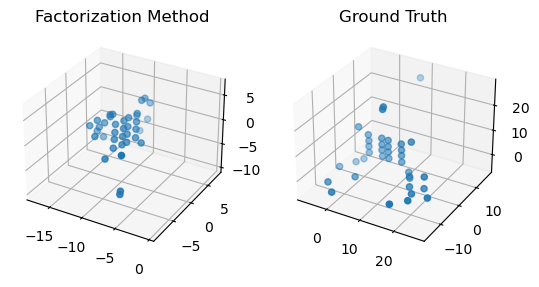

[2341.47094067  238.82019476   43.90557359    5.70472316]


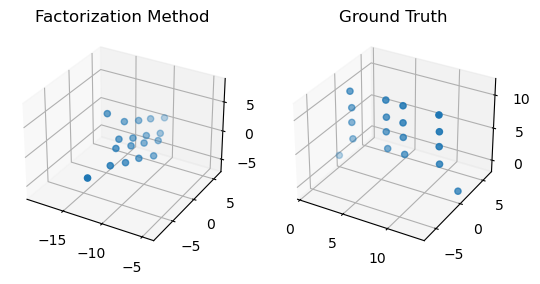

In [4]:
# PSET 2 Problem 3
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import scipy.io as sio
import matplotlib.gridspec as gridspec
from epipolar_utils import *

'''
FACTORIZATION_METHOD The Tomasi and Kanade Factorization Method to determine
the 3D structure of the scene and the motion of the cameras.
Arguments:
    points_im1 - N points in the first image that match with points_im2
    points_im2 - N points in the second image that match with points_im1

    Both points_im1 and points_im2 are from the get_data_from_txt_file() method
Returns:
    structure - the structure matrix
    motion - the motion matrix
'''
def factorization_method(points_im1, points_im2):
    # TODO: Implement this method!
    points1=points_im1[:,:2].T
    points2=points_im2[:,:2].T
    D=np.vstack([points1,points2])
    U,S,V=np.linalg.svd(D)
    print(S)
    U=U[:,:3]
    S=S[:3]
    V=V[:3]
    return  np.sqrt(np.diag(S)).dot(V),U.dot(np.sqrt(np.diag(S)))
    raise Exception('Not Implemented Error')

if __name__ == '__main__':
    for im_set in ['data/set1', 'data/set1_subset']:
        # Read in the data
        im1 = imread(im_set+'/image1.jpg')
        im2 = imread(im_set+'/image2.jpg')
        points_im1 = get_data_from_txt_file(im_set + '/pt_2D_1.txt')
        points_im2 = get_data_from_txt_file(im_set + '/pt_2D_2.txt')
        points_3d = get_data_from_txt_file(im_set + '/pt_3D.txt')
        assert (points_im1.shape == points_im2.shape)

        # Run the Factorization Method
        structure, motion = factorization_method(points_im1, points_im2)

        # Plot the structure
        fig = plt.figure()
        ax = fig.add_subplot(121, projection = '3d')
        scatter_3D_axis_equal(structure[0,:], structure[1,:], structure[2,:], ax)
        ax.set_title('Factorization Method')
        ax = fig.add_subplot(122, projection = '3d')
        scatter_3D_axis_equal(points_3d[:,0], points_3d[:,1], points_3d[:,2], ax)
        ax.set_title('Ground Truth')

        plt.show()

# Problem 4: Triangulation in Structure From Motion

First, make sure you have access to the data. Then, complete this code and then copy it to p4.py for submission to Gradescope.

In [5]:
# PSET 2 Problem 4
import sys
import numpy as np
import os
from scipy.optimize import least_squares
import math
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.io import imread
from sfm_utils import *

'''
ESTIMATE_INITIAL_RT from the Essential Matrix, we can compute 4 initial
guesses of the relative RT between the two cameras
Arguments:
    E - the Essential Matrix between the two cameras
Returns:
    RT: A 4x3x4 tensor in which the 3x4 matrix RT[i,:,:] is one of the
        four possible transformations
'''
def estimate_initial_RT(E):
    # TODO: Implement this method!
    W=np.array([[0,-1,0],[1,0,0],[0,0,1]])
    U,_,V=np.linalg.svd(E)
    R1=np.dot(np.dot(U,W),V)
    R2=np.dot(np.dot(U,W.T),V)
    if np.linalg.det(R1)<0:
        R1=-R1
    if np.linalg.det(R2)<0:
        R2=-R2
    t1=U[:,2]
    t2=-U[:,2]
    RT=np.zeros((4,3,4))
    RT[0,:,:]=np.hstack((R1,t1.reshape(-1,1)))
    RT[1,:,:]=np.hstack((R1,t2.reshape(-1,1)))
    RT[2,:,:]=np.hstack((R2,t1.reshape(-1,1)))
    RT[3,:,:]=np.hstack((R2,t2.reshape(-1,1)))
    return RT

    raise Exception('Not Implemented Error')

'''
LINEAR_ESTIMATE_3D_POINT given a corresponding points in different images,
compute the 3D point is the best linear estimate
Arguments:
    image_points - the measured points in each of the M images (Mx2 matrix)
    camera_matrices - the camera projective matrices (Mx3x4 tensor)
Returns:
    point_3d - the 3D point
'''
def linear_estimate_3d_point(image_points, camera_matrices):
    # TODO: Implement this method!
    A=np.zeros((2*camera_matrices.shape[0],4))
    for i in range(camera_matrices.shape[0]):
        A[2*i,:]=camera_matrices[i,2,:].dot(image_points[i][0])-camera_matrices[i,0,:]
        A[2*i+1,:]=camera_matrices[i,2,:].dot(image_points[i][1])-camera_matrices[i,1,:]
    _,_,V=np.linalg.svd(A)
    point_3d=(V[-1]/V[-1][3])[:3]
    return point_3d
    raise Exception('Not Implemented Error')

'''
REPROJECTION_ERROR given a 3D point and its corresponding points in the image
planes, compute the reprojection error vector and associated Jacobian
Arguments:
    point_3d - the 3D point corresponding to points in the image
    image_points - the measured points in each of the M images (Mx2 matrix)
    camera_matrices - the camera projective matrices (Mx3x4 tensor)
Returns:
    error - the 2Mx1 reprojection error vector
'''
def reprojection_error(point_3d, image_points, camera_matrices):
    # TODO: Implement this method!
    error=np.zeros(2*camera_matrices.shape[0])
    point_3d=np.hstack((point_3d,np.ones(1)))
    for i in range(camera_matrices.shape[0]):
        p=camera_matrices[i].dot(point_3d)
        p=p/p[2]
        error[2*i]=p[0]-image_points[i][0]
        error[2*i+1]=p[1]-image_points[i][1]
    return error
    raise Exception('Not Implemented Error')

'''
JACOBIAN given a 3D point and its corresponding points in the image
planes, compute the reprojection error vector and associated Jacobian
Arguments:
    point_3d - the 3D point corresponding to points in the image
    camera_matrices - the camera projective matrices (Mx3x4 tensor)
Returns:
    jacobian - the 2Mx3 Jacobian matrix
'''
def jacobian(point_3d, camera_matrices):
    # TODO: Implement this method!
    
    jacobian=np.zeros((2*camera_matrices.shape[0],3))
    point_3d=np.hstack((point_3d,np.ones(1)))
    for i in range(camera_matrices.shape[0]):
        p=camera_matrices[i].dot(point_3d)
        p0, p1, p2 = p[0], p[1], p[2]
        
        # Calculate the Jacobian for u = p0/p2 and v = p1/p2
        # Partial derivatives for u
        jacobian[2 * i, 0] = (camera_matrices[i, 0, 0] * p2 - camera_matrices[i, 2, 0] * p0) / (p2 ** 2)
        jacobian[2 * i, 1] = (camera_matrices[i, 0, 1] * p2 - camera_matrices[i, 2, 1] * p0) / (p2 ** 2)
        jacobian[2 * i, 2] = (camera_matrices[i, 0, 2] * p2 - camera_matrices[i, 2, 2] * p0) / (p2 ** 2)
        
        # Partial derivatives for v
        jacobian[2 * i + 1, 0] = (camera_matrices[i, 1, 0] * p2 - camera_matrices[i, 2, 0] * p1) / (p2 ** 2)
        jacobian[2 * i + 1, 1] = (camera_matrices[i, 1, 1] * p2 - camera_matrices[i, 2, 1] * p1) / (p2 ** 2)
        jacobian[2 * i + 1, 2] = (camera_matrices[i, 1, 2] * p2 - camera_matrices[i, 2, 2] * p1) / (p2 ** 2)
    return jacobian

    

'''
NONLINEAR_ESTIMATE_3D_POINT given a corresponding points in different images,
compute the 3D point that iteratively updates the points
Arguments:
    image_points - the measured points in each of the M images (Mx2 matrix)
    camera_matrices - the camera projective matrices (Mx3x4 tensor)
Returns:
    point_3d - the 3D point
'''
def nonlinear_estimate_3d_point(image_points, camera_matrices):
    # TODO: Implement this method!
    point_init=linear_estimate_3d_point(image_points,camera_matrices)
    for i in range(10):
        error=reprojection_error(point_init,image_points,camera_matrices)
        J=jacobian(point_init,camera_matrices)
        point_init=point_init-np.linalg.inv(J.T.dot(J)).dot(J.T).dot(error)
    return point_init
    raise Exception('Not Implemented Error')

'''
ESTIMATE_RT_FROM_E from the Essential Matrix, we can compute  the relative RT 
between the two cameras
Arguments:
    E - the Essential Matrix between the two cameras
    image_points - N measured points in each of the M images (NxMx2 matrix)
    K - the intrinsic camera matrix
Returns:
    RT: The 3x4 matrix which gives the rotation and translation between the 
        two cameras
'''
def estimate_RT_from_E(E, image_points, K):
    # TODO: Implement this method!
    RT=estimate_initial_RT(E)
   
    maxi=0
    num_max=0
    M1=np.hstack((np.eye(3),np.zeros((3,1))))
    for i in range(4):
        M=np.array([M1,np.dot(K,RT[i])])
        num=0
        for j in range(image_points.shape[0]):
            points_2d=image_points[j].reshape(image_points.shape[1],2)
            point_3d=nonlinear_estimate_3d_point(points_2d,M)
            
            if point_3d[2]>0:
                num+=1
            point_3d=np.hstack((point_3d,np.ones(1)))
            point_3d_2f=RT[i].dot(point_3d)
            if point_3d_2f[2]>0:
                num+=1
            if num>num_max:
                num_max=num
                maxi=i
    return RT[maxi]
    raise Exception('Not Implemented Error')

if __name__ == '__main__':
    run_pipeline = True

    # Load the data
    image_data_dir = 'data/statue/'
    unit_test_camera_matrix = np.load('data/unit_test_camera_matrix.npy')
    unit_test_image_matches = np.load('data/unit_test_image_matches.npy')
    image_paths = [os.path.join(image_data_dir, 'images', x) for x in
        sorted(os.listdir('data/statue/images')) if '.jpg' in x]
    focal_length = 719.5459
    matches_subset = np.load(os.path.join(image_data_dir,
        'matches_subset.npy'), allow_pickle=True, encoding='latin1')[0,:]
    dense_matches = np.load(os.path.join(image_data_dir, 'dense_matches.npy'), 
                               allow_pickle=True, encoding='latin1')
    fundamental_matrices = np.load(os.path.join(image_data_dir,
        'fundamental_matrices.npy'), allow_pickle=True, encoding='latin1')[0,:]

    # Part A: Computing the 4 initial R,T transformations from Essential Matrix
    print('-' * 80)
    print("Part A: Check your matrices against the example R,T")
    print('-' * 80)
    K = np.eye(3)
    K[0,0] = K[1,1] = focal_length
    E = K.T.dot(fundamental_matrices[0]).dot(K)
    im0 = imread(image_paths[0])
    im_height, im_width, _ = im0.shape
    example_RT = np.array([[0.9736, -0.0988, -0.2056, 0.9994],
        [0.1019, 0.9948, 0.0045, -0.0089],
        [0.2041, -0.0254, 0.9786, 0.0331]])
    print("Example RT:\n", example_RT)
    estimated_RT = estimate_initial_RT(E)
    print('')
    print("Estimated RT:\n", estimated_RT)

    # Part B: Determining the best linear estimate of a 3D point
    print('-' * 80)
    print('Part B: Check that the difference from expected point ')
    print('is near zero')
    print('-' * 80)
    camera_matrices = np.zeros((2, 3, 4))
    camera_matrices[0, :, :] = K.dot(np.hstack((np.eye(3), np.zeros((3,1)))))
    camera_matrices[1, :, :] = K.dot(example_RT)
    unit_test_matches = matches_subset[0][:,0].reshape(2,2)
    estimated_3d_point = linear_estimate_3d_point(unit_test_matches.copy(),
        camera_matrices.copy())
    expected_3d_point = np.array([0.6774, -1.1029, 4.6621])
    print("Difference: ", np.fabs(estimated_3d_point - expected_3d_point).sum())

    # Part C: Calculating the reprojection error and its Jacobian
    print('-' * 80)
    print('Part C: Check that the difference from expected error/Jacobian ')
    print('is near zero')
    print('-' * 80)
    estimated_error = reprojection_error(
            expected_3d_point, unit_test_matches, camera_matrices)
    estimated_jacobian = jacobian(expected_3d_point, camera_matrices)
    expected_error = np.array((-0.0095458, -0.5171407,  0.0059307,  0.501631))
    print("Error Difference: ", np.fabs(estimated_error - expected_error).sum())
    expected_jacobian = np.array([[ 154.33943931, 0., -22.42541691],
         [0., 154.33943931, 36.51165089],
         [141.87950588, -14.27738422, -56.20341644],
         [21.9792766, 149.50628901, 32.23425643]])
    print("Jacobian Difference: ", np.fabs(estimated_jacobian
        - expected_jacobian).sum())

    # Part D: Determining the best nonlinear estimate of a 3D point
    print('-' * 80)
    print('Part D: Check that the reprojection error from nonlinear method')
    print('is lower than linear method')
    print('-' * 80)
    estimated_3d_point_linear = linear_estimate_3d_point(
        unit_test_image_matches.copy(), unit_test_camera_matrix.copy())
    estimated_3d_point_nonlinear = nonlinear_estimate_3d_point(
        unit_test_image_matches.copy(), unit_test_camera_matrix.copy())
    error_linear = reprojection_error(
        estimated_3d_point_linear, unit_test_image_matches,
        unit_test_camera_matrix)
    print("Linear method error:", np.linalg.norm(error_linear))
    error_nonlinear = reprojection_error(
        estimated_3d_point_nonlinear, unit_test_image_matches,
        unit_test_camera_matrix)
    print("Nonlinear method error:", np.linalg.norm(error_nonlinear))

    # Part E: Determining the correct R, T from Essential Matrix
    print('-' * 80)
    print("Part E: Check your matrix against the example R,T")
    print('-' * 80)
    estimated_RT = estimate_RT_from_E(E,
        np.expand_dims(unit_test_image_matches[:2,:], axis=0), K)
    print("Example RT:\n", example_RT)
    print('')
    print("Estimated RT:\n", estimated_RT)

    # Part F: Run the entire Structure from Motion pipeline
    if not run_pipeline:
        sys.exit()
    print('-' * 80)
    print('Part F: Run the entire SFM pipeline')
    print('-' * 80)
    frames = [0] * (len(image_paths) - 1)
    for i in range(len(image_paths)-1):
        frames[i] = Frame(matches_subset[i].T, focal_length,
                fundamental_matrices[i], im_width, im_height)
        bundle_adjustment(frames[i])
    merged_frame = merge_all_frames(frames)

    # Construct the dense matching
    camera_matrices = np.zeros((2,3,4))
    dense_structure = np.zeros((0,3))
    for i in range(len(frames)-1):
        matches = dense_matches[i]
        camera_matrices[0,:,:] = merged_frame.K.dot(
            merged_frame.motion[i,:,:])
        camera_matrices[1,:,:] = merged_frame.K.dot(
                merged_frame.motion[i+1,:,:])
        points_3d = np.zeros((matches.shape[1], 3))
        use_point = np.array([True]*matches.shape[1])
        for j in range(matches.shape[1]):
            points_3d[j,:] = nonlinear_estimate_3d_point(
                matches[:,j].reshape((2,2)), camera_matrices)
        dense_structure = np.vstack((dense_structure, points_3d[use_point,:]))

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.scatter(dense_structure[:,0], dense_structure[:,1], dense_structure[:,2],
        c='k', depthshade=True, s=2)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(0, 10)
    ax.view_init(-100, 90)

    plt.show()

--------------------------------------------------------------------------------
Part A: Check your matrices against the example R,T
--------------------------------------------------------------------------------
Example RT:
 [[ 0.9736 -0.0988 -0.2056  0.9994]
 [ 0.1019  0.9948  0.0045 -0.0089]
 [ 0.2041 -0.0254  0.9786  0.0331]]

Estimated RT:
 [[[ 0.98305251 -0.11787055 -0.14040758  0.99941228]
  [-0.11925737 -0.99286228 -0.00147453 -0.00886961]
  [-0.13923158  0.01819418 -0.99009269  0.03311219]]

 [[ 0.98305251 -0.11787055 -0.14040758 -0.99941228]
  [-0.11925737 -0.99286228 -0.00147453  0.00886961]
  [-0.13923158  0.01819418 -0.99009269 -0.03311219]]

 [[ 0.97364135 -0.09878708 -0.20558119  0.99941228]
  [ 0.10189204  0.99478508  0.00454512 -0.00886961]
  [ 0.2040601  -0.02537241  0.97862951  0.03311219]]

 [[ 0.97364135 -0.09878708 -0.20558119 -0.99941228]
  [ 0.10189204  0.99478508  0.00454512  0.00886961]
  [ 0.2040601  -0.02537241  0.97862951 -0.03311219]]]
-------------------

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1000x1000 with 0 Axes>

That's it, you are done! Remember to submit your code by copying the code from Colab to p[X].py, and submitting it to Gradescope by zipping the .py files and uploading the zip file to the coding assignment.

